# ANOVA

Analysis of Variance

In [ ]:
ANOVA - used to analyze the differences among group means in a dataset.
- is there any statistically significant difference between the means of two or more groups.


feature selection - healthcare - biomarkers
customer segmentation - which fators significantlly influence customer spending
quality control (manufacturing) - source of variance
emplyee performance analysis - 



In [ ]:
One-way ANOVA

- compares the variance in group means within sample.

when to use one-way ANOVA?
- categorical independent variable
- one independent variable



### Business Problem

Test the relationship between shoe brand and race finish times in a marathon.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
np.random.seed(11)

shoe_brand_names = ['nike', 'adidas', 'saucony', 'hoka', 'converse', 'puma', 'timberland']

shoe_brands = np.random.choice(a = shoe_brand_names,
                              p = [0.05, 0.13, 0.25, 0.05, 0.3, 0.2, 0.02],
                              size=5000)

marathon_times = stats.poisson.rvs(loc=18, mu=30, size=5000)

In [3]:
# help(stats.poisson.rvs)

In [6]:
marathon_frame = pd.DataFrame({"shoe": shoe_brands, "marathon": marathon_times})

marathon_frame

,shoe,marathon
0,saucony,40
1,nike,64
2,hoka,46
3,converse,58
4,saucony,50
...,...,...
4995,converse,52
4996,saucony,51
4997,adidas,38
4998,saucony,48


In [7]:
groups = marathon_frame.groupby('shoe').groups

In [11]:
# groups

In [12]:
# extract individual values

nike = marathon_times[groups['nike']]
adidas = marathon_times[groups['adidas']]
saucony = marathon_times[groups['saucony']]
hoka = marathon_times[groups['hoka']]
converse = marathon_times[groups['converse']]
puma = marathon_times[groups['puma']]
timberland = marathon_times[groups['timberland']]

In [ ]:
# conduct one way anova

Hypothesis

H0: there is no significant difference between the group means

H1: there is significant difference between the group means

In [13]:
stats.f_oneway(nike, adidas, saucony, hoka, converse, puma, timberland)

F_onewayResult(statistic=1.0545716280465174, pvalue=0.38768383569947124)

In [14]:
# one-way anova test using statsmodels

model = ols('marathon ~ shoe',
           data = marathon_frame).fit()

anova_result = sm.stats.anova_lm(model, typ=1)

print(anova_result)

              df         sum_sq    mean_sq         F    PR(>F)
shoe         6.0     187.079498  31.179916  1.054572  0.387684
Residual  4993.0  147625.176302  29.566428       NaN       NaN


In [ ]:
p-value(0.05) < 0.38  -> reject the H1

In [15]:
# post-hoc test - 

shoe_pairs = []

for shoe1 in range(6):
    for shoe2 in range(shoe1 + 1, 7):
        shoe_pairs.append((shoe_brand_names[shoe1], shoe_brand_names[shoe2]))
    
for shoe1, shoe2 in shoe_pairs:
    print("Pairs of shoe brands:", shoe1, shoe2)
    print(stats.ttest_ind(marathon_times[groups[shoe1]], marathon_times[groups[shoe2]]))

Pairs of shoe brands: nike adidas
Ttest_indResult(statistic=0.8862922831439877, pvalue=0.37570245392836255)
Pairs of shoe brands: nike saucony
Ttest_indResult(statistic=1.762786440980292, pvalue=0.07814149286846872)
Pairs of shoe brands: nike hoka
Ttest_indResult(statistic=0.48809058611147266, pvalue=0.6257044580453001)
Pairs of shoe brands: nike converse
Ttest_indResult(statistic=1.8181934419646448, pvalue=0.06921059220729714)
Pairs of shoe brands: nike puma
Ttest_indResult(statistic=1.296447582452365, pvalue=0.1950585274992822)
Pairs of shoe brands: nike timberland
Ttest_indResult(statistic=0.2843933937002686, pvalue=0.7762957825486976)
Pairs of shoe brands: adidas saucony
Ttest_indResult(statistic=1.2037135839092055, pvalue=0.22884922680385597)
Pairs of shoe brands: adidas hoka
Ttest_indResult(statistic=-0.35913420982773653, pvalue=0.7195778199442804)
Pairs of shoe brands: adidas converse
Ttest_indResult(statistic=1.2501515788807367, pvalue=0.21138202761894428)
Pairs of shoe brands:

group1,group2,meandiff,p-adj,lower,upper,reject
adidas,converse,-0.3195,0.8747,-1.074,0.435,False
adidas,hoka,0.1428,0.9998,-1.0304,1.3159,False
adidas,nike,0.3789,0.9715,-0.8531,1.6109,False
adidas,puma,-0.1336,0.999,-0.9356,0.6685,False
adidas,saucony,-0.3209,0.8851,-1.0943,0.4525,False
adidas,timberland,0.1783,1.0,-1.6431,1.9997,False
converse,hoka,0.4623,0.8667,-0.6131,1.5377,False
converse,nike,0.6984,0.5425,-0.4409,1.8377,False
converse,puma,0.1859,0.9804,-0.4648,0.8367,False
converse,saucony,-0.0014,1.0,-0.6166,0.6137,False


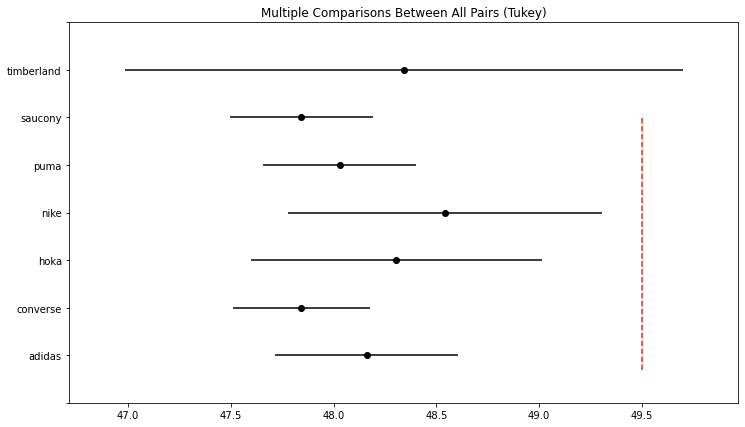

In [16]:
tukey = pairwise_tukeyhsd(endog = marathon_times, groups=shoe_brands, alpha=0.05)

tukey.plot_simultaneous(figsize=(12,7))

plt.vlines(x=49.5, ymin=-0.3, ymax=5, colors="#F0260A", linestyles='dashed')

tukey.summary()

# Chi Square Test

In [ ]:
- categorical variables 
- determine the association or independence of categorical variables
- is there any significant relationship between two or more categorical variables 
  between compairing observed and expected values.


- text classification
- market basket analysis - inventory management, optimizing store layouts
- image classification - 
- website user behavior - 

In [ ]:
Hypothisis testing

H0: no relationship(independent)

H1: there is a relationship(dependent)

In [18]:
np.random.seed(10)

type_bottle = np.random.choice(a = ['paper', 'cans', 'glass', 'others', 'plastic'],
                              p = [0.05, 0.15, 0.25, 0.05, 0.5],
                              size = 1000)

month = np.random.choice(a=['January', 'February', 'March'],
                        p = [0.4, 0.2, 0.4],
                        size=1000)

bottles = pd.DataFrame({"types":type_bottle,
                      "months": month})

bottles_tab = pd.crosstab(bottles.types, bottles.months, margins=True)

bottles_tab.columns = ['January', 'February', 'March', 'row_totals']
bottles_tab.index = ['paper', 'cans', 'glass', 'others', 'plastic', 'col_totals']

observed = bottles_tab.iloc[0:5, 0:3]

In [20]:
bottles_tab

,January,February,March,row_totals
paper,25,65,64,154
cans,50,107,94,251
glass,8,15,15,38
others,7,21,32,60
plastic,96,189,212,497
col_totals,186,397,417,1000


In [22]:
expected = np.outer(bottles_tab['row_totals'][0:5], bottles_tab.loc['col_totals'][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ['January', 'February', 'March']

expected.index = ['paper', 'cans', 'glass', 'others', 'plastic']

expected

,January,February,March
paper,28.644,61.138,64.218
cans,46.686,99.647,104.667
glass,7.068,15.086,15.846
others,11.160,23.820,25.020
plastic,92.442,197.309,207.249


In [23]:
chi_square_stat = (((observed - expected)**2)/expected).sum().sum()

chi_square_stat

7.169321280162059

In [25]:
critical_value = stats.chi2.ppf(q=0.95, df=8)

critical_value

15.50731305586545

In [27]:
p_value = 1 - stats.chi2.cdf(x=chi_square_stat, df=8)

p_value

0.518479392948842

In [ ]:
5x3 -> 4x2 -> 8